# Lending Club Case Study

We are going to perform EDA on the given dataset. It will help us to understand main drivers for defaulters which in turn helps organization to avoid sanctioning of loan in future with same consumer and loan attributes. This will help Organization from potential financial loss.

#### Import necessary libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Sourcing

Given datasource is a CSV file. It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

In [82]:
loan_data = pd.read_csv("D:\\Master of Science\\EDA\\Lend - Case study\\loan\\loan.csv")

C:\Users\Githen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


`Preliminary analysis of loan dataframe`

In [83]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [84]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Finding out the number of rows and columns in the dataframe

In [85]:
loan_data.shape

(39717, 111)

In [86]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [87]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## 2. Data Cleaning

a) Find out columns with all values as Null

b) Find out columns and unique value count - If the count is very less or huge it may not be very useful for analysis

` Get all rows and columns to display. Setting the maximum rows and columns `

In [88]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [89]:
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Remove all columns where all values are NA

In [90]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

#### There were around 54 columns with all values as NA 

In [91]:
loan_data.shape

(39717, 57)

In [92]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Find out Unique values in each column

In [93]:
print(loan_data.nunique(axis=0))

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### It is clear that there are certain columns with just one unique value. These columns may not contribute to our analysis.

In [94]:
loan_data.drop(["pymnt_plan","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"],axis=1,inplace = True)

In [95]:
loan_data.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

In [96]:
## count of columns


len(loan_data.columns)

48

#### Removal of further columns

After removing couple of unnecessary columnsm, we are still having 48 columns. But on a closer inspection it is very evident that we can remove more columns as it will not give any insights from Business requirement standpoint. 
For example all IDs can be removed as it is unique and will not give any useful insights.
Also there are certain features which captures information after awarding the loan.

In [97]:
final_columns = ["loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","purpose","addr_state","dti","inq_last_6mths","pub_rec"]

In [98]:
column_remove = [i for i in loan_data.columns if i not in final_columns]

In [99]:
loan_data.drop(column_remove,axis = 1, inplace=True)

In [100]:
loan_data.shape

(39717, 20)

#### Our final data set is having 20 columns and it consists of customer attributes while applying loan and also loan attributes

In [101]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'inq_last_6mths',
       'pub_rec'],
      dtype='object')

#### Business objective is to find out the likely defaulters or people who pay back full amount

Hence we need to focus on observations having loan_status as "Fully paid" or "Charged off". From a business objective standpoint loan_status value "Current" is not having any significance

In [102]:
loan_data = loan_data[loan_data.loan_status != "Current"]

#### Final list contains 38577 observations and 20 variables

In [103]:
loan_data.shape

(38577, 20)

In [104]:
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2386
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
pub_rec                   0
dtype: int64

In [105]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

#### Missing Emp_length can be imputed with Mode as it is a categorical variable

In [106]:
loan_data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [107]:
loan_data.emp_length.mode()[0]

'10+ years'

In [108]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0],inplace=True)

In [109]:
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2386
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
pub_rec                   0
dtype: int64

In [110]:
loan_data.shape

(38577, 20)

In [111]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           38577 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

#### Extracting only numbers from Employee Length column and converting it into a numeric field

In [112]:
loan_data['emp_length']=loan_data.emp_length.str.extract('(\d+)')

In [113]:
loan_data.emp_length.value_counts()

10    9521
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [114]:
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

In [115]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           38577 non-null  int64  
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

## 3. Univariate Analysis

#### To check the distribution of dependent variable Loan Status

In [116]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### loan_status

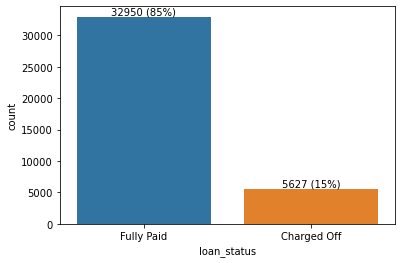

In [117]:
ax = sns.countplot(x=loan_data['loan_status'],
                   order=loan_data['loan_status'].value_counts(ascending=False).index);
        
abs_values = loan_data['loan_status'].value_counts(ascending=False)
rel_values = loan_data['loan_status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

### Insights
#### We can understand from above chart , the average default rate is around 15%

### purpose

In [118]:
loan_data_charge_off = loan_data[loan_data.loan_status == 'Charged Off']

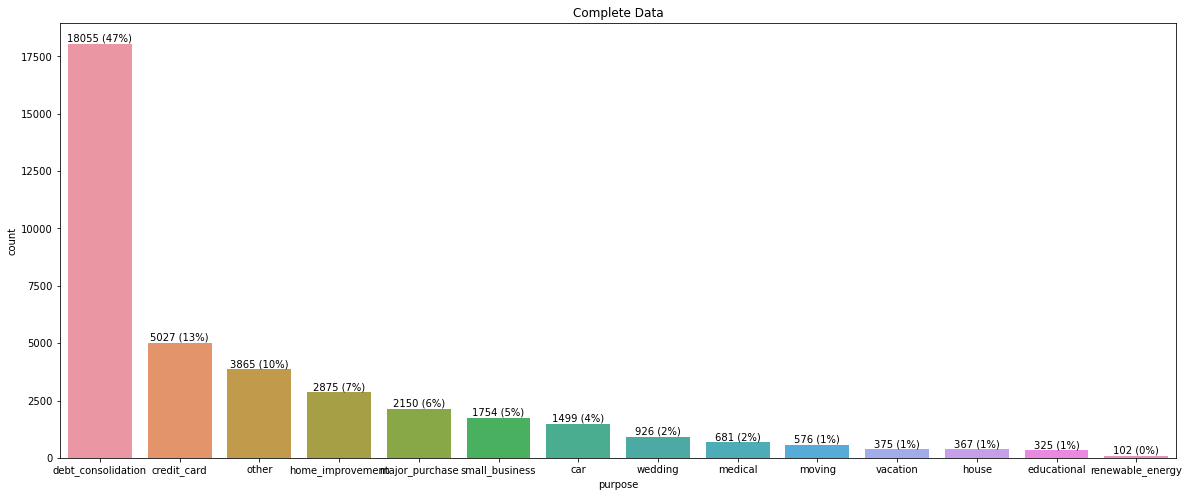

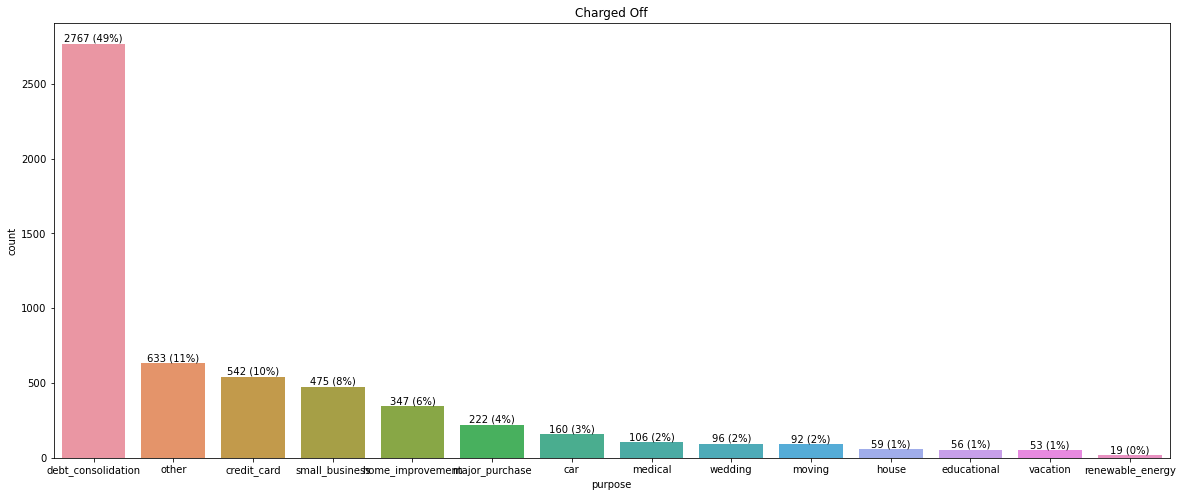

In [119]:

plt.figure(figsize=(20,8))
plt.title("Complete Data")
ax = sns.countplot(x=loan_data['purpose'],
                   order=loan_data['purpose'].value_counts(ascending=False).index);
        
abs_values = loan_data['purpose'].value_counts(ascending=False)
rel_values = loan_data['purpose'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()


plt.figure(figsize=(20,8))
plt.title("Charged Off")
ax = sns.countplot(x=loan_data_charge_off['purpose'],
                   order=loan_data_charge_off['purpose'].value_counts(ascending=False).index);
        
abs_values = loan_data_charge_off['purpose'].value_counts(ascending=False)
rel_values = loan_data_charge_off['purpose'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

### Insights

#### Major purpose of the loan are ::

debt_consolidation,
credit_card,
other,
home_improvement,
major_purchase,
small_business,
car



#### when it comes to defaulters order changed slightly
debt_consolidation,
other,
credit_card,
small_business ,
home_improvement,
major_purchase,
car

small_business, debt consolidation, other categories percentage increased when we restrict the data set to "charged off". So closer inspection is required before providing the loan for this purpose


### term

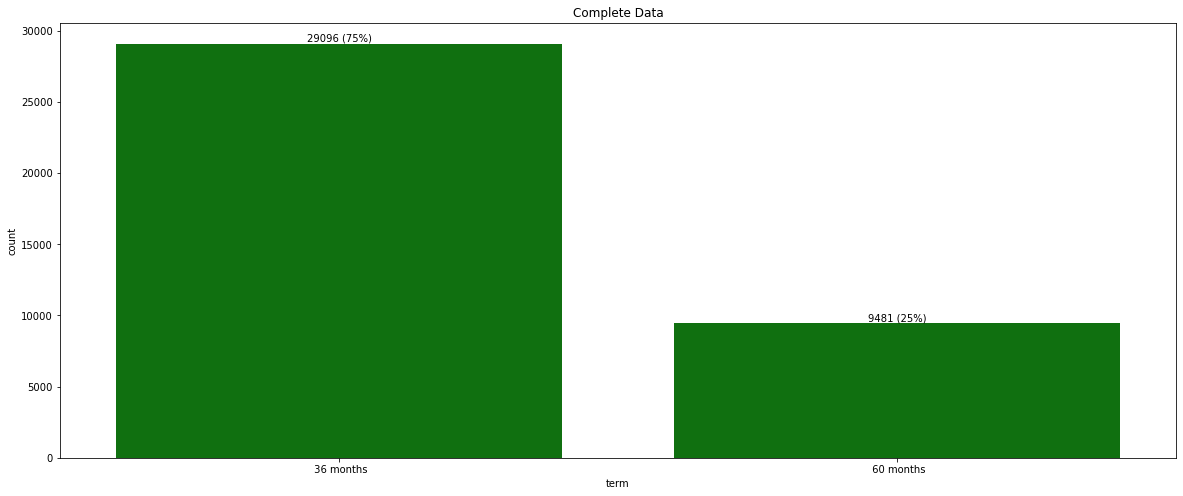

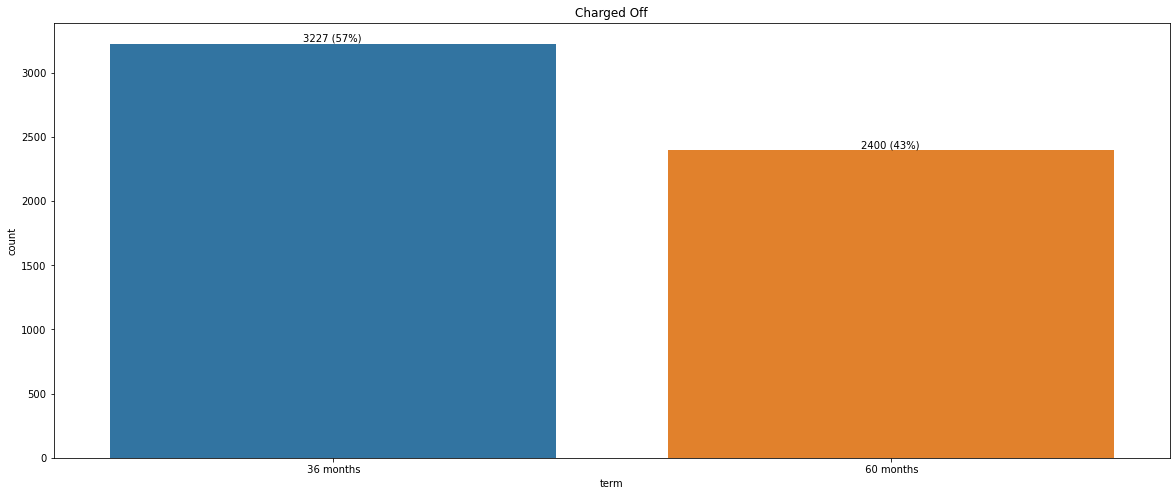

In [120]:
plt.figure(figsize=(20,8))
plt.title("Complete Data")

ax = sns.countplot(x=loan_data['term'],
                   order=loan_data['term'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['term'].value_counts(ascending=False)
rel_values = loan_data['term'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(20,8))
plt.title("Charged Off")
ax = sns.countplot(x=loan_data_charge_off['term'],
                   order=loan_data_charge_off['term'].value_counts(ascending=False).index);
        
abs_values = loan_data_charge_off['term'].value_counts(ascending=False)
rel_values = loan_data_charge_off['term'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()



### Insights

#### 60 month terms are 25% of the total records but when it comes to defaulters the percentage increased to 43%

Company should be more careful while awarding 60 months loan term

### Grade

In [121]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

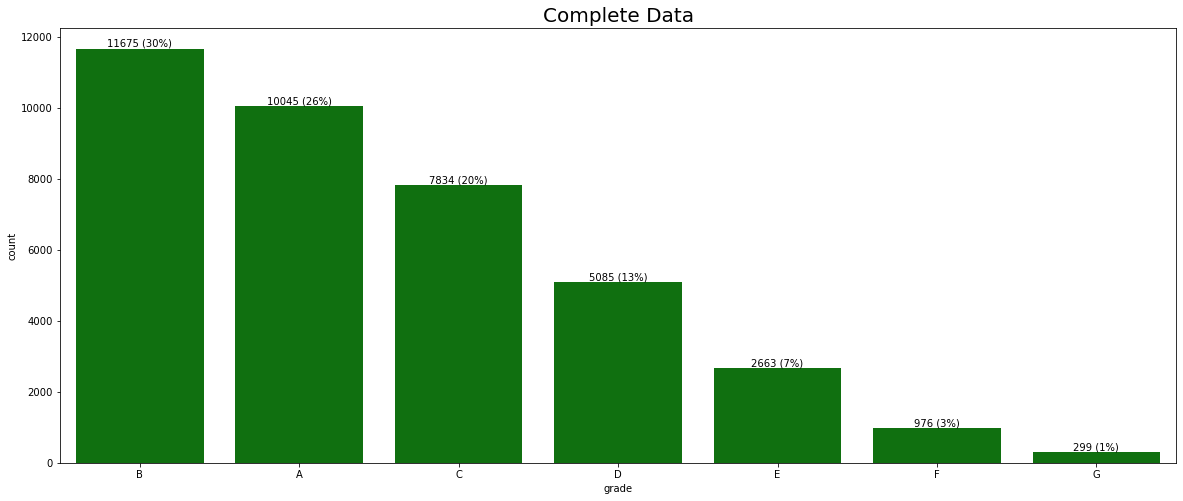

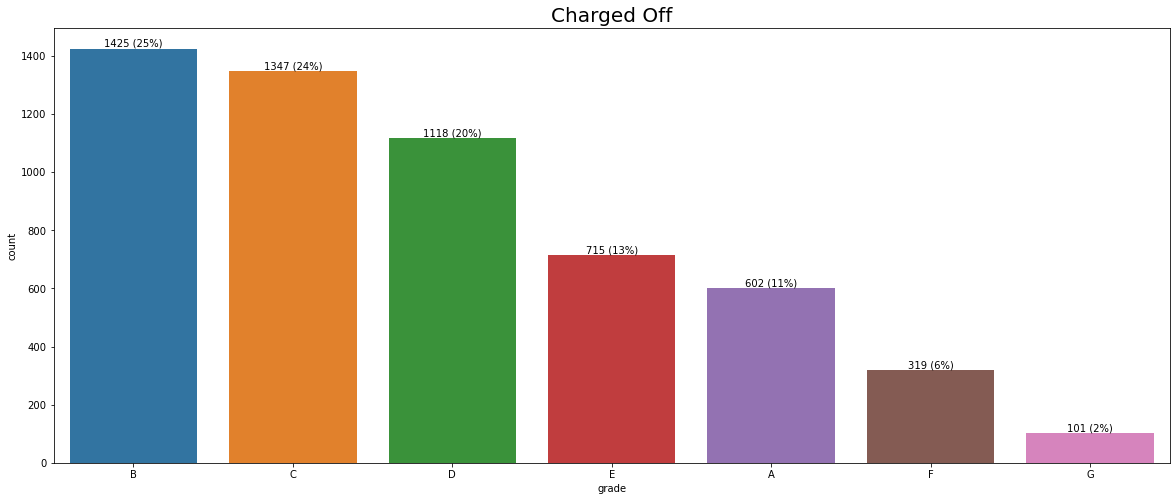

In [164]:
plt.figure(figsize=(20,8))
plt.title("Complete Data",fontsize = 20)

ax = sns.countplot(x=loan_data['grade'],
                   order=loan_data['grade'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['grade'].value_counts(ascending=False)
rel_values = loan_data['grade'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(20,8))
plt.title("Charged Off",fontsize = 20)
ax = sns.countplot(x=loan_data_charge_off['grade'],
                   order=loan_data_charge_off['grade'].value_counts(ascending=False).index);
        
abs_values = loan_data_charge_off['grade'].value_counts(ascending=False)
rel_values = loan_data_charge_off['grade'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

### Insights

#### Almost 90% of loans are in Grades B, A, C, D

% of defaulters with respect to total number are less in Grade A compared to other Grades

## Emp_length

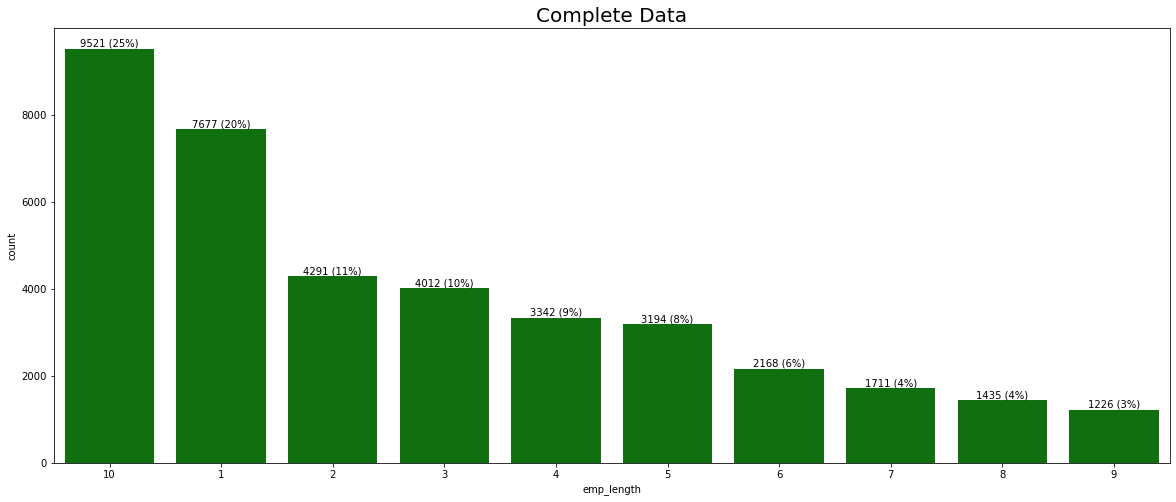

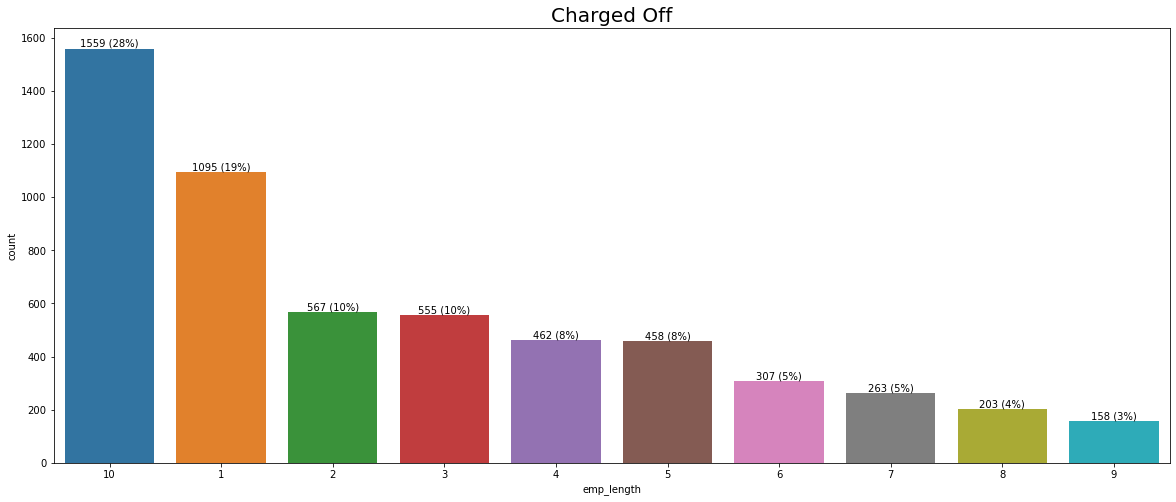

In [123]:
plt.figure(figsize=(20,8))
plt.title("Complete Data",fontsize = 20)

ax = sns.countplot(x=loan_data['emp_length'],
                   order=loan_data['emp_length'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['emp_length'].value_counts(ascending=False)
rel_values = loan_data['emp_length'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(20,8))
plt.title("Charged Off",fontsize = 20)
ax = sns.countplot(x=loan_data_charge_off['emp_length'],
                   order=loan_data_charge_off['emp_length'].value_counts(ascending=False).index);
        
abs_values = loan_data_charge_off['emp_length'].value_counts(ascending=False)
rel_values = loan_data_charge_off['emp_length'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()


### Insights

#### People with 1 year and 10 year experience are taking loans more frequently and they are the most defaulters also

## home_ownership

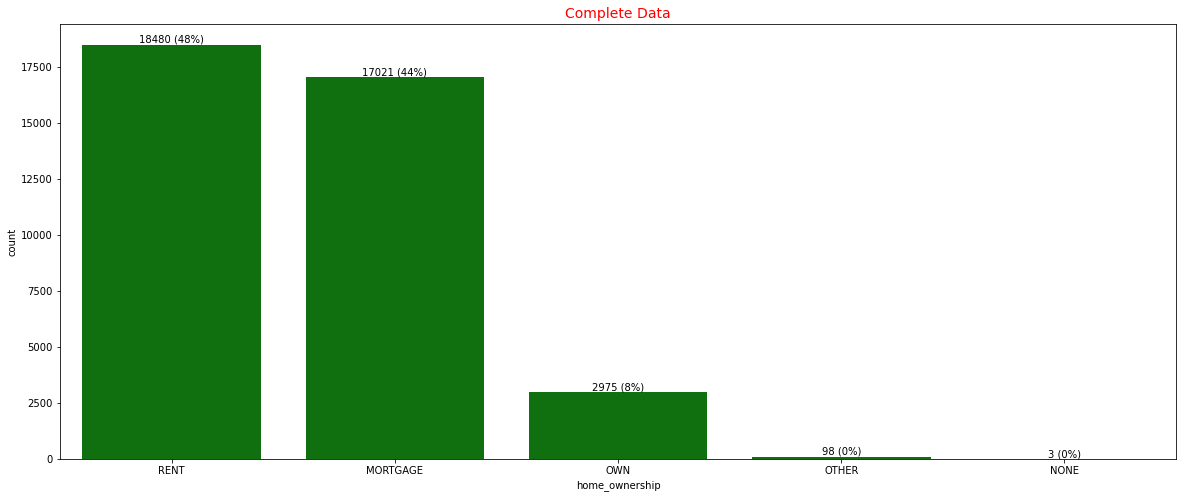

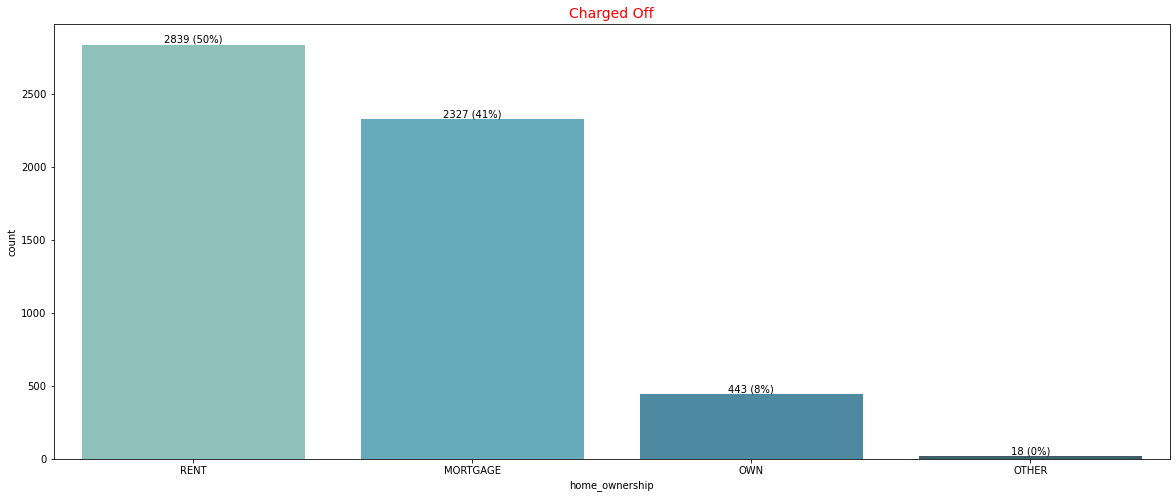

In [124]:
plt.figure(figsize=(20,8))
plt.title("Complete Data", fontsize=14,color='r')

ax = sns.countplot(x=loan_data['home_ownership'],
                   order=loan_data['home_ownership'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['home_ownership'].value_counts(ascending=False)
rel_values = loan_data['home_ownership'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(20,8))
plt.title("Charged Off", fontsize=14,color='r')
ax = sns.countplot(x=loan_data_charge_off['home_ownership'],
                   order=loan_data_charge_off['home_ownership'].value_counts(ascending=False).index, palette='GnBu_d');
        
abs_values = loan_data_charge_off['home_ownership'].value_counts(ascending=False)
rel_values = loan_data_charge_off['home_ownership'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

### Insights

#### Loan applicants from people who owns a home are comparatively less

## verification_status

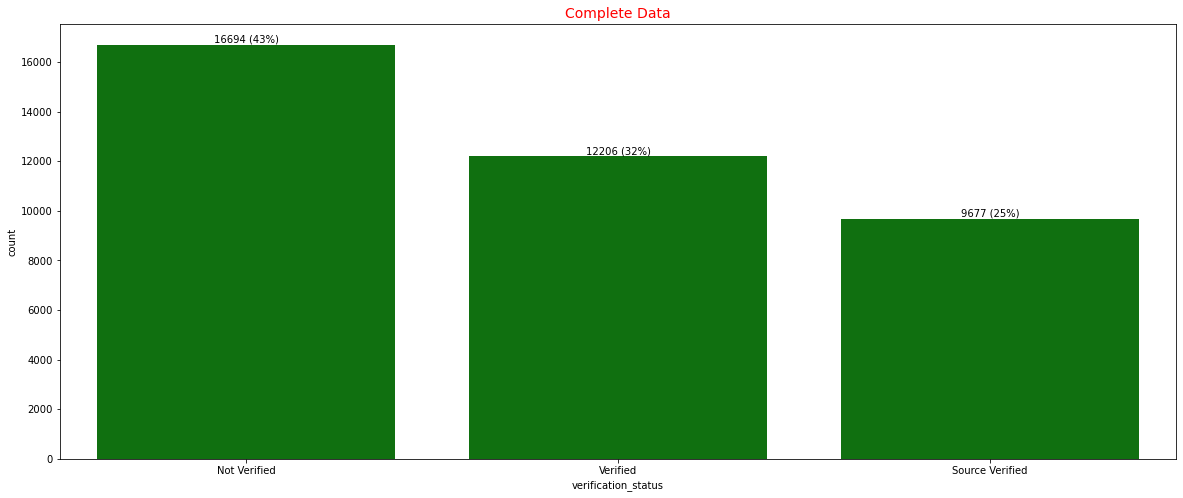

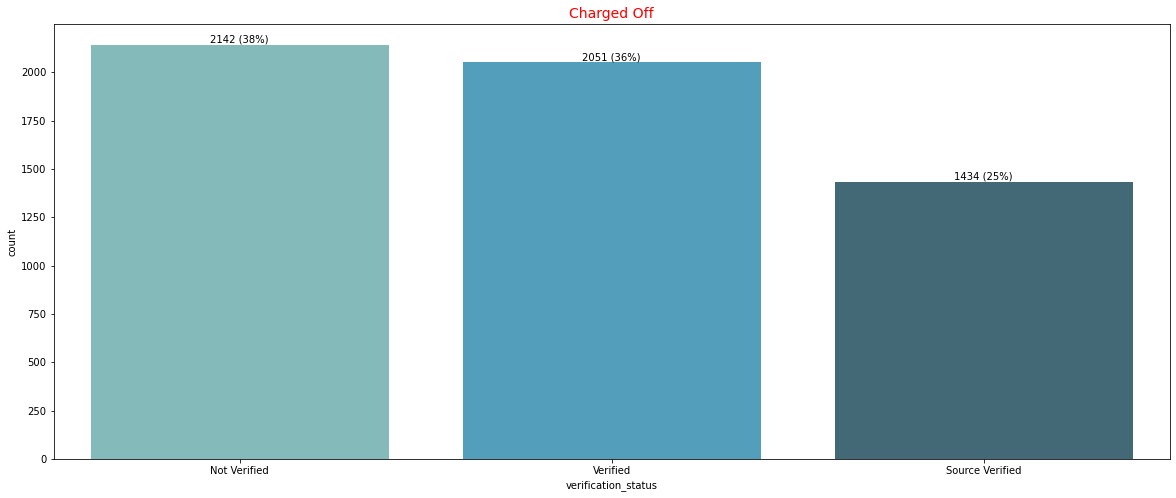

In [125]:
plt.figure(figsize=(20,8))
plt.title("Complete Data", fontsize=14,color='r')

ax = sns.countplot(x=loan_data['verification_status'], 
                   order=loan_data['verification_status'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['verification_status'].value_counts(ascending=False)
rel_values = loan_data['verification_status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(20,8))
plt.title("Charged Off", fontsize=14,color='r')
ax = sns.countplot(x=loan_data_charge_off['verification_status'],
                   order=loan_data_charge_off['verification_status'].value_counts(ascending=False).index, palette='GnBu_d');
        
abs_values = loan_data_charge_off['verification_status'].value_counts(ascending=False)
rel_values = loan_data_charge_off['verification_status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

### Insights

#### 43% Loans are being issued even if the income is not verified

## Loan Year from Loan date & Analysis

In [126]:
import datetime
loan_data['issue_year'] = loan_data['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loan_data_charge_off['issue_year'] = loan_data_charge_off['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)

C:\Users\Githen\AppData\Local\Temp/ipykernel_21576/4257179000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_charge_off['issue_year'] = loan_data_charge_off['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)


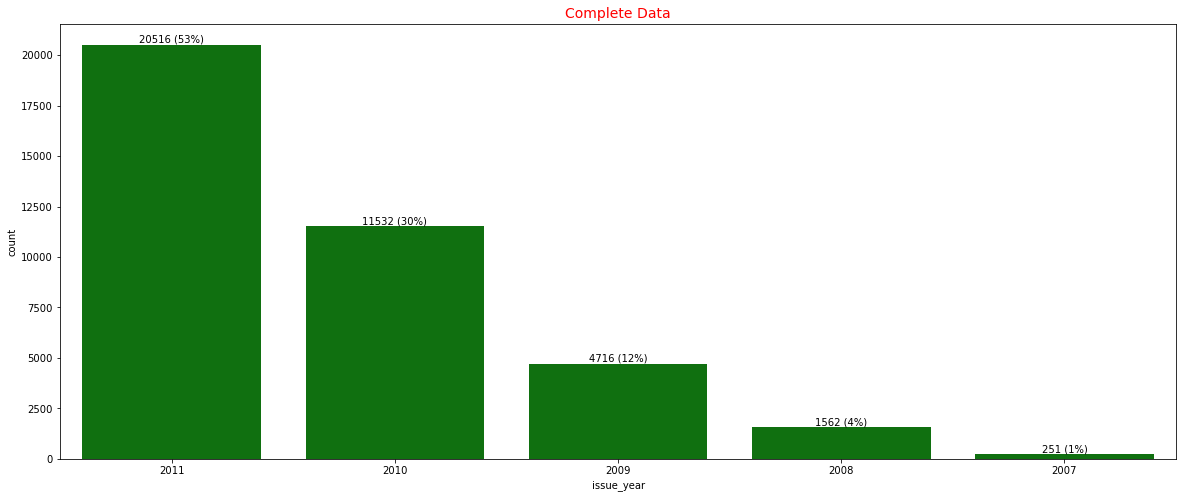

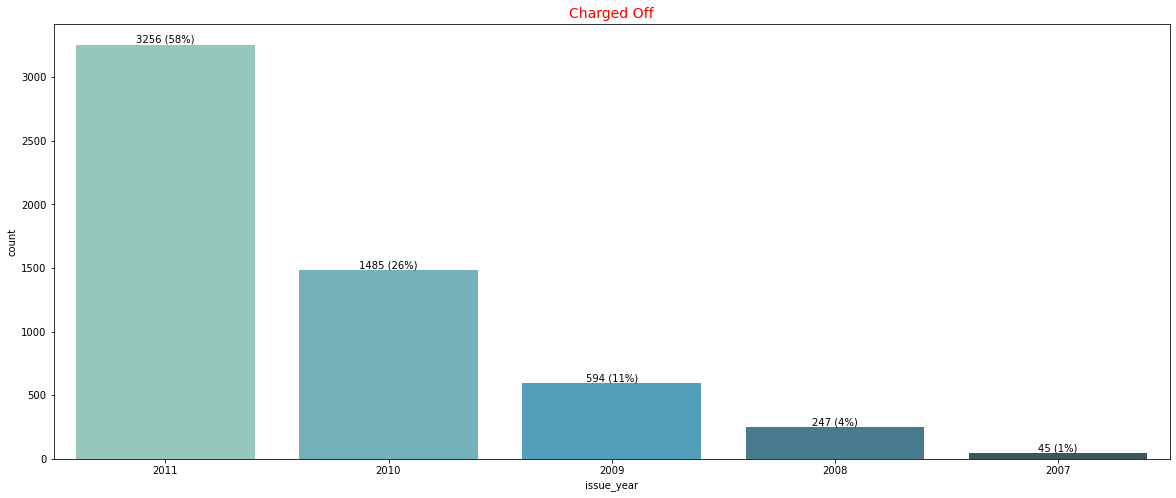

In [127]:
plt.figure(figsize=(20,8))
plt.title("Complete Data", fontsize=14,color='r')

ax = sns.countplot(x=loan_data['issue_year'], 
                   order=loan_data['issue_year'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['issue_year'].value_counts(ascending=False)
rel_values = loan_data['issue_year'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(20,8))
plt.title("Charged Off", fontsize=14,color='r')
ax = sns.countplot(x=loan_data_charge_off['issue_year'],
                   order=loan_data_charge_off['issue_year'].value_counts(ascending=False).index, palette='GnBu_d');
        
abs_values = loan_data_charge_off['issue_year'].value_counts(ascending=False)
rel_values = loan_data_charge_off['issue_year'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

### Insights

#### There is a consistent increase in loan applicants each year. Number of defaulters are increasing every year more than double in comparison with previous year

## addr_state

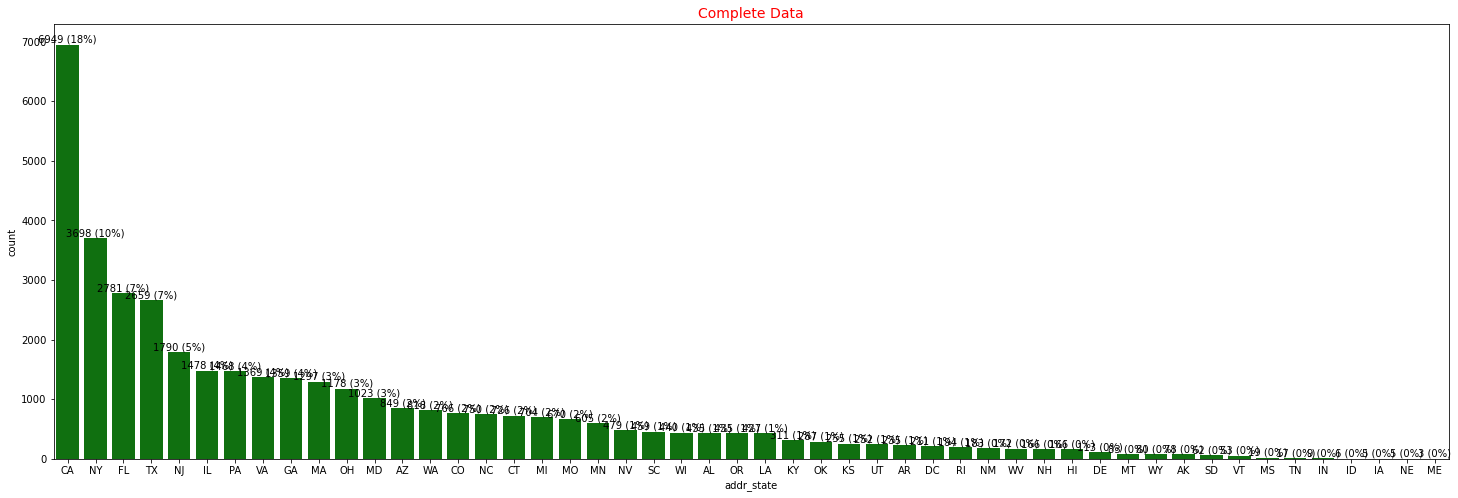

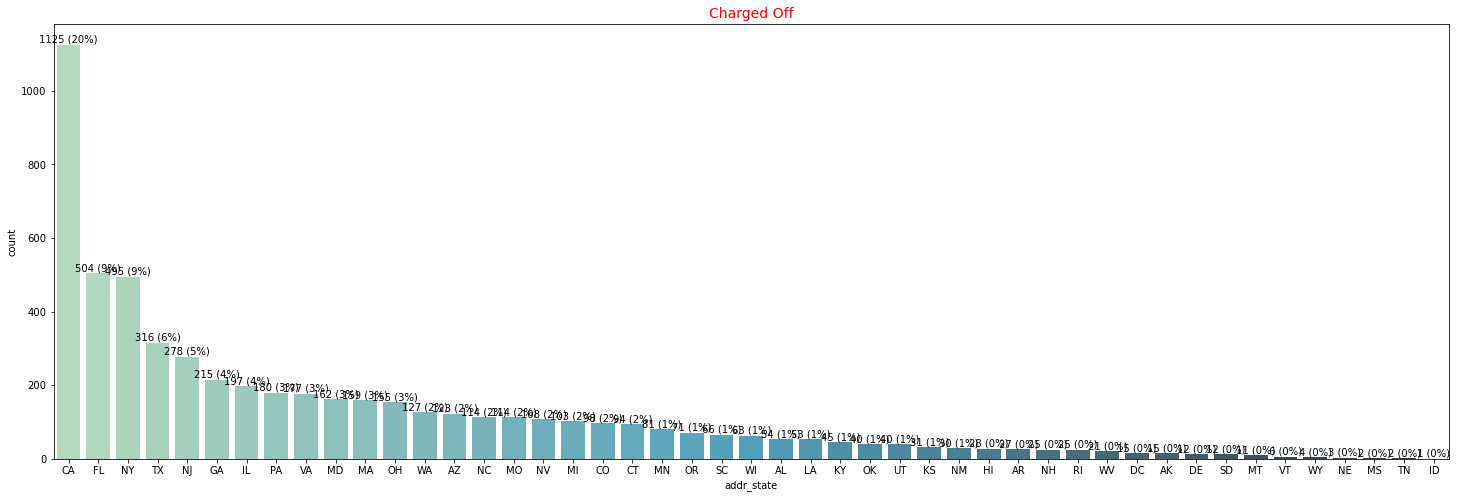

In [128]:
plt.figure(figsize=(25,8))
plt.title("Complete Data", fontsize=14,color='r')

ax = sns.countplot(x=loan_data['addr_state'], 
                   order=loan_data['addr_state'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['addr_state'].value_counts(ascending=False)
rel_values = loan_data['addr_state'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(25,8))
plt.title("Charged Off", fontsize=14,color='r')
ax = sns.countplot(x=loan_data_charge_off['addr_state'],
                   order=loan_data_charge_off['addr_state'].value_counts(ascending=False).index, palette='GnBu_d');
        
abs_values = loan_data_charge_off['addr_state'].value_counts(ascending=False)
rel_values = loan_data_charge_off['addr_state'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

####  Adding a new column count to get the frequency or number of records easily

In [129]:
loan_data["Count"] = 1

In [130]:
loan_data.shape

(38577, 22)

### Distribution of Numeric Variables

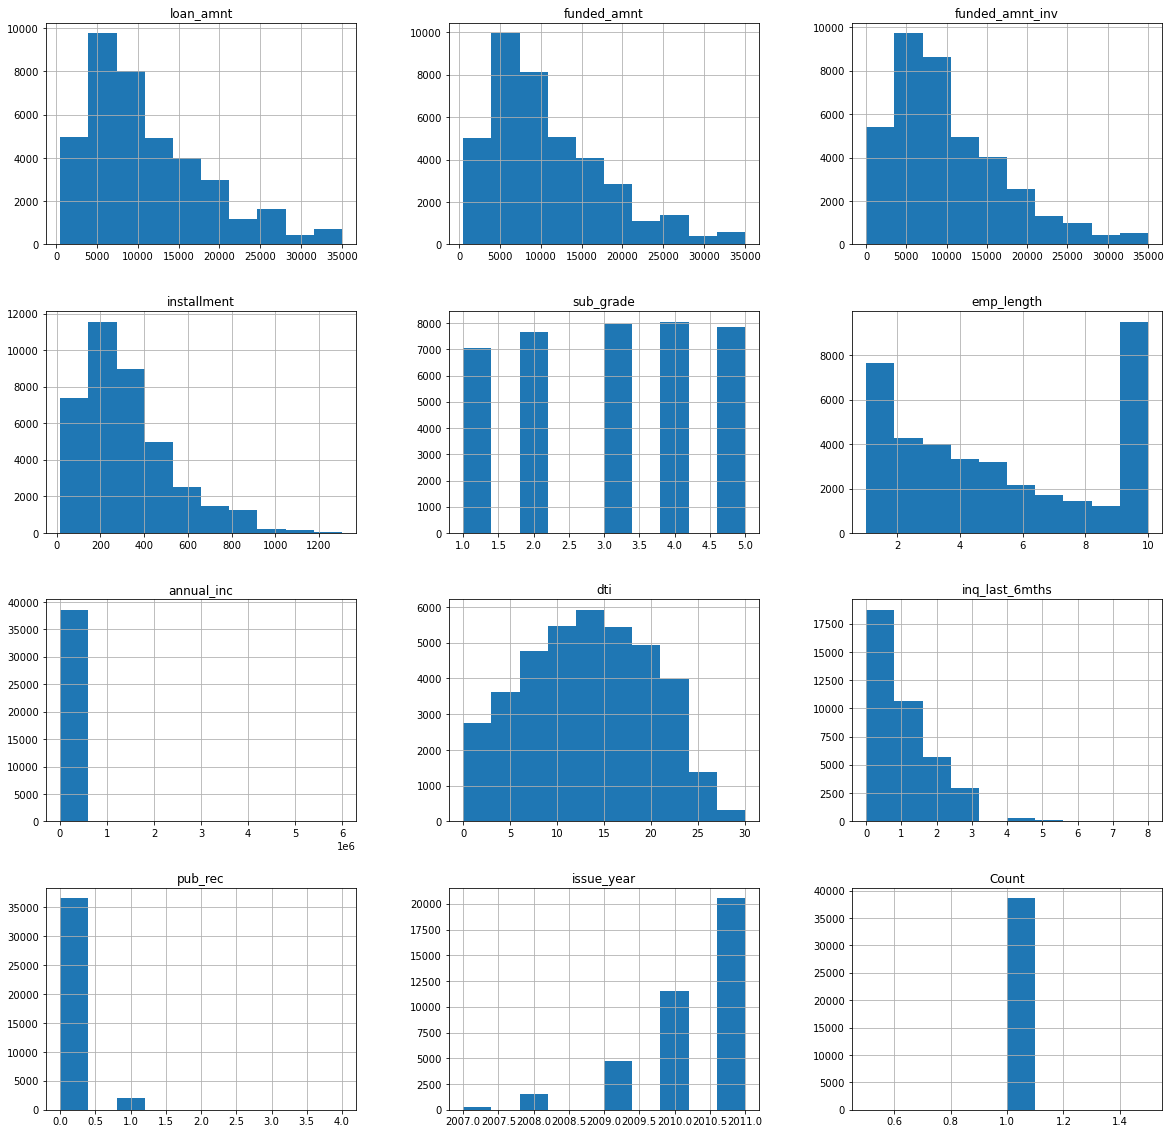

In [131]:
loan_data.hist(figsize=(20,20))
plt.show()

In [132]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,sub_grade,emp_length,annual_inc,dti,inq_last_6mths,pub_rec,issue_year,Count
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.0
mean,11047.025430,10784.058506,10222.481123,322.466318,3.052389,5.193302,6.877797e+04,13.272727,0.871737,0.055422,2010.309070,1.0
std,7348.441646,7090.306027,7022.720644,208.639215,1.395903,3.449311,6.421868e+04,6.673044,1.071546,0.237804,0.882658,0.0
min,500.000000,500.000000,0.000000,15.690000,1.000000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2007.000000,1.0
25%,5300.000000,5200.000000,5000.000000,165.740000,2.000000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,2010.000000,1.0
50%,9600.000000,9550.000000,8733.440000,277.860000,3.000000,4.000000,5.886800e+04,13.370000,1.000000,0.000000,2011.000000,1.0
75%,15000.000000,15000.000000,14000.000000,425.550000,4.000000,9.000000,8.200000e+04,18.560000,1.000000,0.000000,2011.000000,1.0
max,35000.000000,35000.000000,35000.000000,1305.190000,5.000000,10.000000,6.000000e+06,29.990000,8.000000,4.000000,2011.000000,1.0


### Insights from histograms & Table
#### 75 % of loan amount request are for less than 15000
####  dti is almost normally distributed
#### It is very evident that there are some outliers in Annual income

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

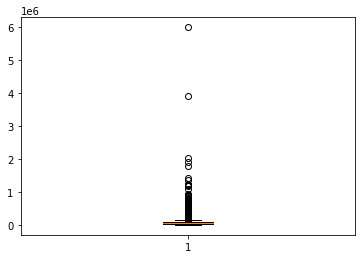

In [133]:
plt.boxplot(loan_data.annual_inc)
loan_data.annual_inc.describe()

#### Above box plot shows the clear presence of outliers in Annual Income field

In [179]:
loan_data.annual_inc.quantile(0.95)

140004.0

#### 95th Quartile value is 140004 but the maximum value is 600000. There is a huge difference between 95th Quartile and maximum value and it proves the presence of outliers

In [183]:
loan_data_ai_wo_outlier = loan_data[loan_data.annual_inc <= loan_data.annual_inc.quantile(.95)]
loan_data_ai_wo_outlier.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

C:\Users\Githen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

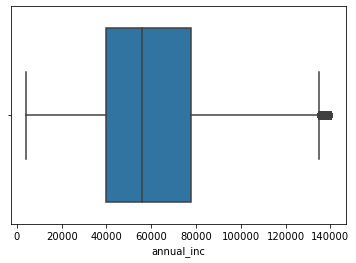

In [136]:
sns.boxplot(loan_data_ai_wo_outlier.annual_inc)

#### removed outliers lying above 95th quartile and copied into a new data frame. Created the box plot on new data frame and it still shows some outliers. Hence we have not changed the original data frame loan_data.

## 4. Derived Metrics

#### Since we have Loan Amount and Annual income fields , we can find out a new ratio (Loan to Annual Income) which will be helpful in our further analysis

In [137]:
loan_data['l_ai'] = round(loan_data['loan_amnt']/loan_data['annual_inc'],2)

In [138]:
loan_data['dti_range'] = loan_data['dti'].apply(lambda x : 'low' if x<=10.00 else('medium' if (x >10.00 and x <= 20.00) else 'high' ))

In [139]:
loan_data['l_ai_range'] = loan_data['l_ai'].apply(lambda x : 'low' if x<=0.15 else('medium' if (x >0.15 and x <= 0.25) else 'high' ))

In [140]:
loan_data['exp_range'] = loan_data['emp_length'].apply(lambda x : 'low' if x<=4 else('medium' if (x >4 and x <= 8) else 'high' ))

## 5. Bivariate Analysis

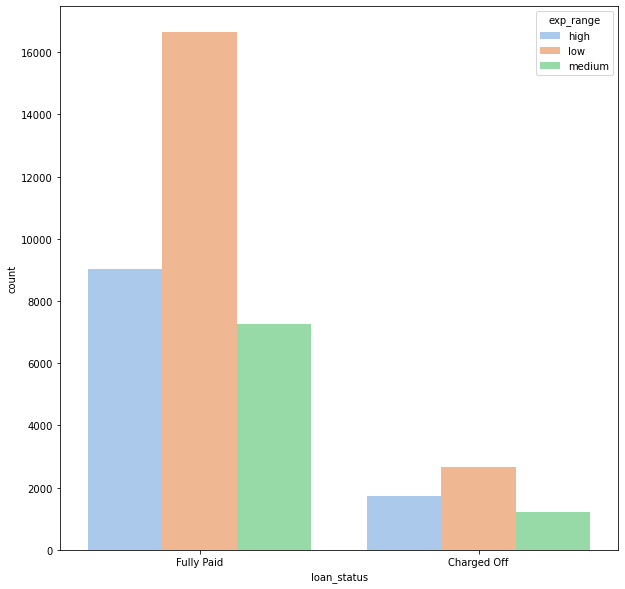

In [141]:
plt.figure(figsize=(10,10))
sns.countplot(data =loan_data,x='loan_status', hue ='exp_range',palette="pastel")
plt.show()

### Insights
#### people with less experience are having high chance of default

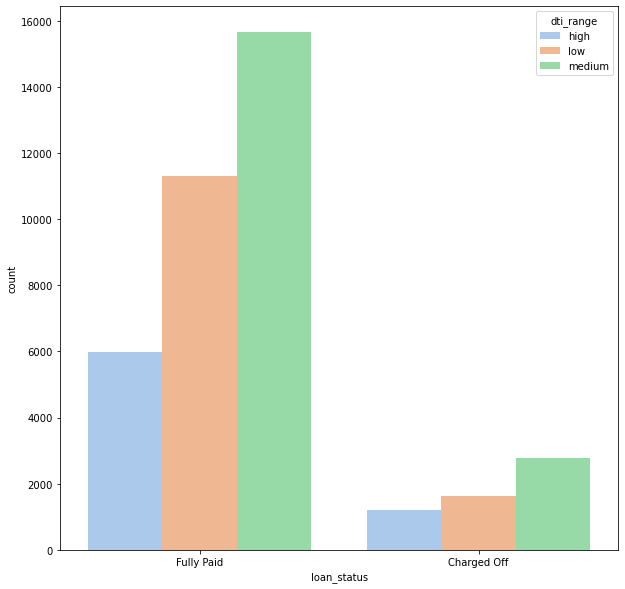

In [142]:
plt.figure(figsize=(10,10))
sns.countplot(data =loan_data,x='loan_status', hue ='dti_range',palette="pastel")
plt.show()

### Insights

#### People in Medium dti range is taking more loans and proportionately default rate is also high in medium range

In [143]:
loan_data_charge_off = loan_data[loan_data.loan_status == 'Charged Off']

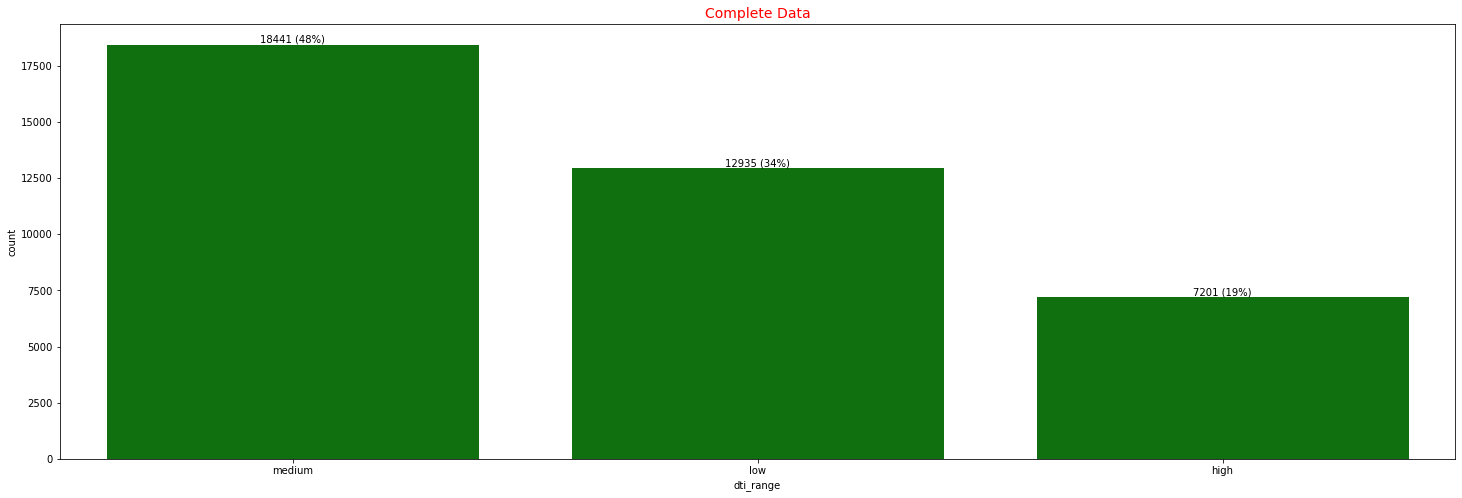

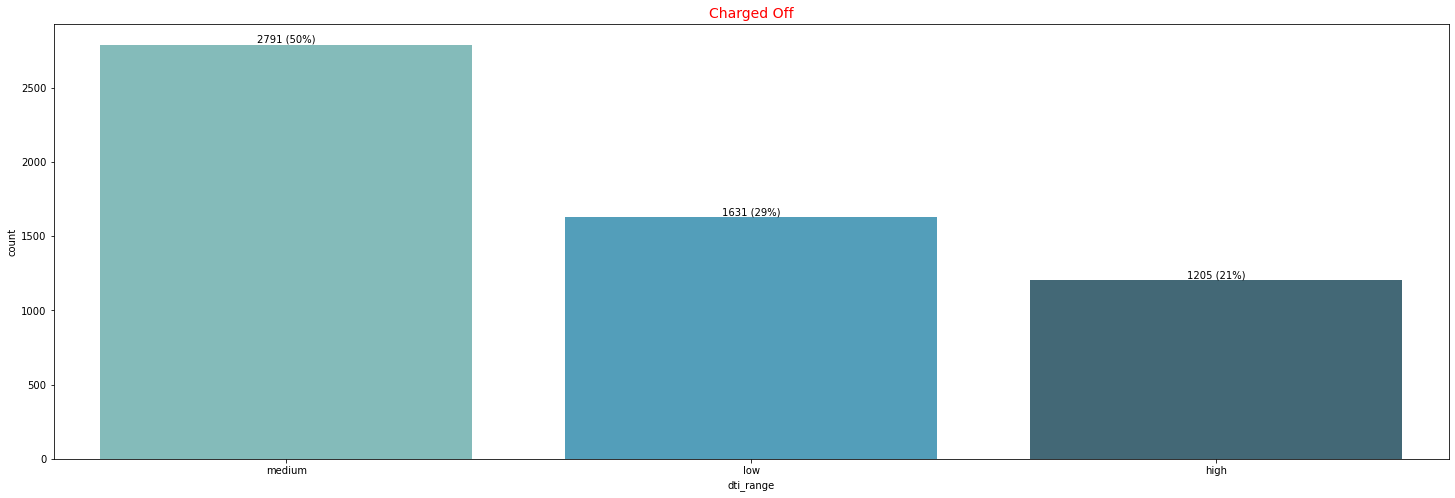

In [144]:
plt.figure(figsize=(25,8))
plt.title("Complete Data", fontsize=14,color='r')

ax = sns.countplot(x=loan_data['dti_range'], 
                   order=loan_data['dti_range'].value_counts(ascending=False).index, color = 'green');
        
abs_values = loan_data['dti_range'].value_counts(ascending=False)
rel_values = loan_data['dti_range'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

plt.figure(figsize=(25,8))
plt.title("Charged Off", fontsize=14,color='r')
ax = sns.countplot(x=loan_data_charge_off['dti_range'],
                   order=loan_data_charge_off['dti_range'].value_counts(ascending=False).index, palette='GnBu_d');
        
abs_values = loan_data_charge_off['dti_range'].value_counts(ascending=False)
rel_values = loan_data_charge_off['dti_range'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.show()

### Insights

#### Default probability is more in medium and high dti range

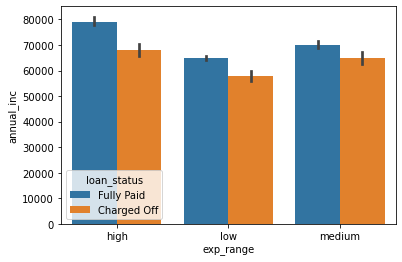

In [146]:
sns.barplot(data=loan_data, x='exp_range', y = 'annual_inc', hue = 'loan_status',estimator = np.mean)
plt.show()

#### average Annual income of Fully paid applicants are always higher across experience range 

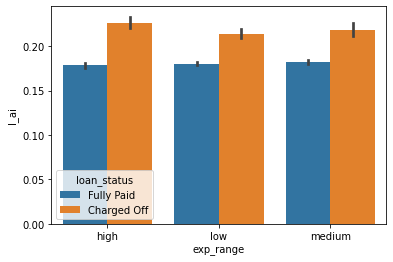

In [147]:
sns.barplot(data=loan_data, x='exp_range', y = 'l_ai', hue = 'loan_status',estimator = np.mean)
plt.show()

#### average Loan to annual income ratio is always higher in charge off applicants across experience range

In [148]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [149]:
loan_data.shape

(38577, 27)

In [150]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,issue_year,Count,l_ai,dti_range,l_ai_range,exp_range,loan_amnt_groups
0,5000,5000,4975.0,36 months,10.65%,162.87,B,2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,0,2011,1,0.21,high,medium,high,0-5k
1,2500,2500,2500.0,60 months,15.27%,59.83,C,4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,0,2011,1,0.08,low,low,low,0-5k
2,2400,2400,2400.0,36 months,15.96%,84.33,C,5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,2011,1,0.20,low,medium,high,0-5k
3,10000,10000,10000.0,36 months,13.49%,339.31,C,1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,0,2011,1,0.20,medium,medium,high,5k-10k
5,5000,5000,5000.0,36 months,7.90%,156.46,A,4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,3,0,2011,1,0.14,medium,low,low,0-5k


In [151]:
loan_data["int_rate_num"] = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

<Figure size 7200x7200 with 0 Axes>

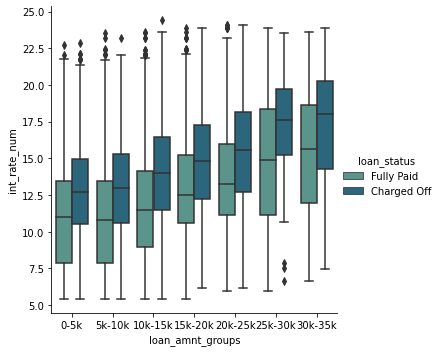

In [152]:
plt.figure(figsize=(100,100))
sns.catplot(data =loan_data,y ='int_rate_num', x ='loan_amnt_groups', hue ='loan_status',palette="crest",kind = 'box')
plt.show()

#### Interest rate distribution of Charged off loans are consistently higher across loan amount groups

Looks like Interest rate is a potential driver

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

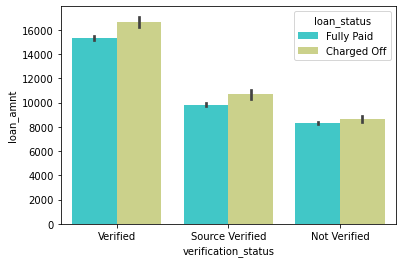

In [153]:
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status', palette = 'rainbow')

#### Loan amount of verified sources are higher. Either company is approving higher loan amounts after verification or Priority verification is being done on higher amount loans

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

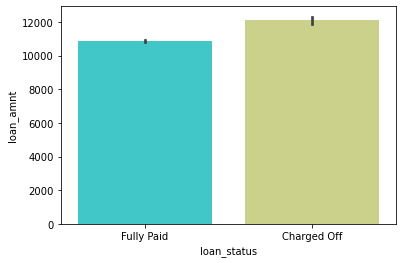

In [154]:
sns.barplot(data =loan_data,y='loan_amnt', x='loan_status', palette = 'rainbow', estimator = np.mean)

#### Average loan amount of Charged off group is higher than Fully paid. This means tightening of loan amount eligibility scrutiny is required

### Correlation among Numerical variables

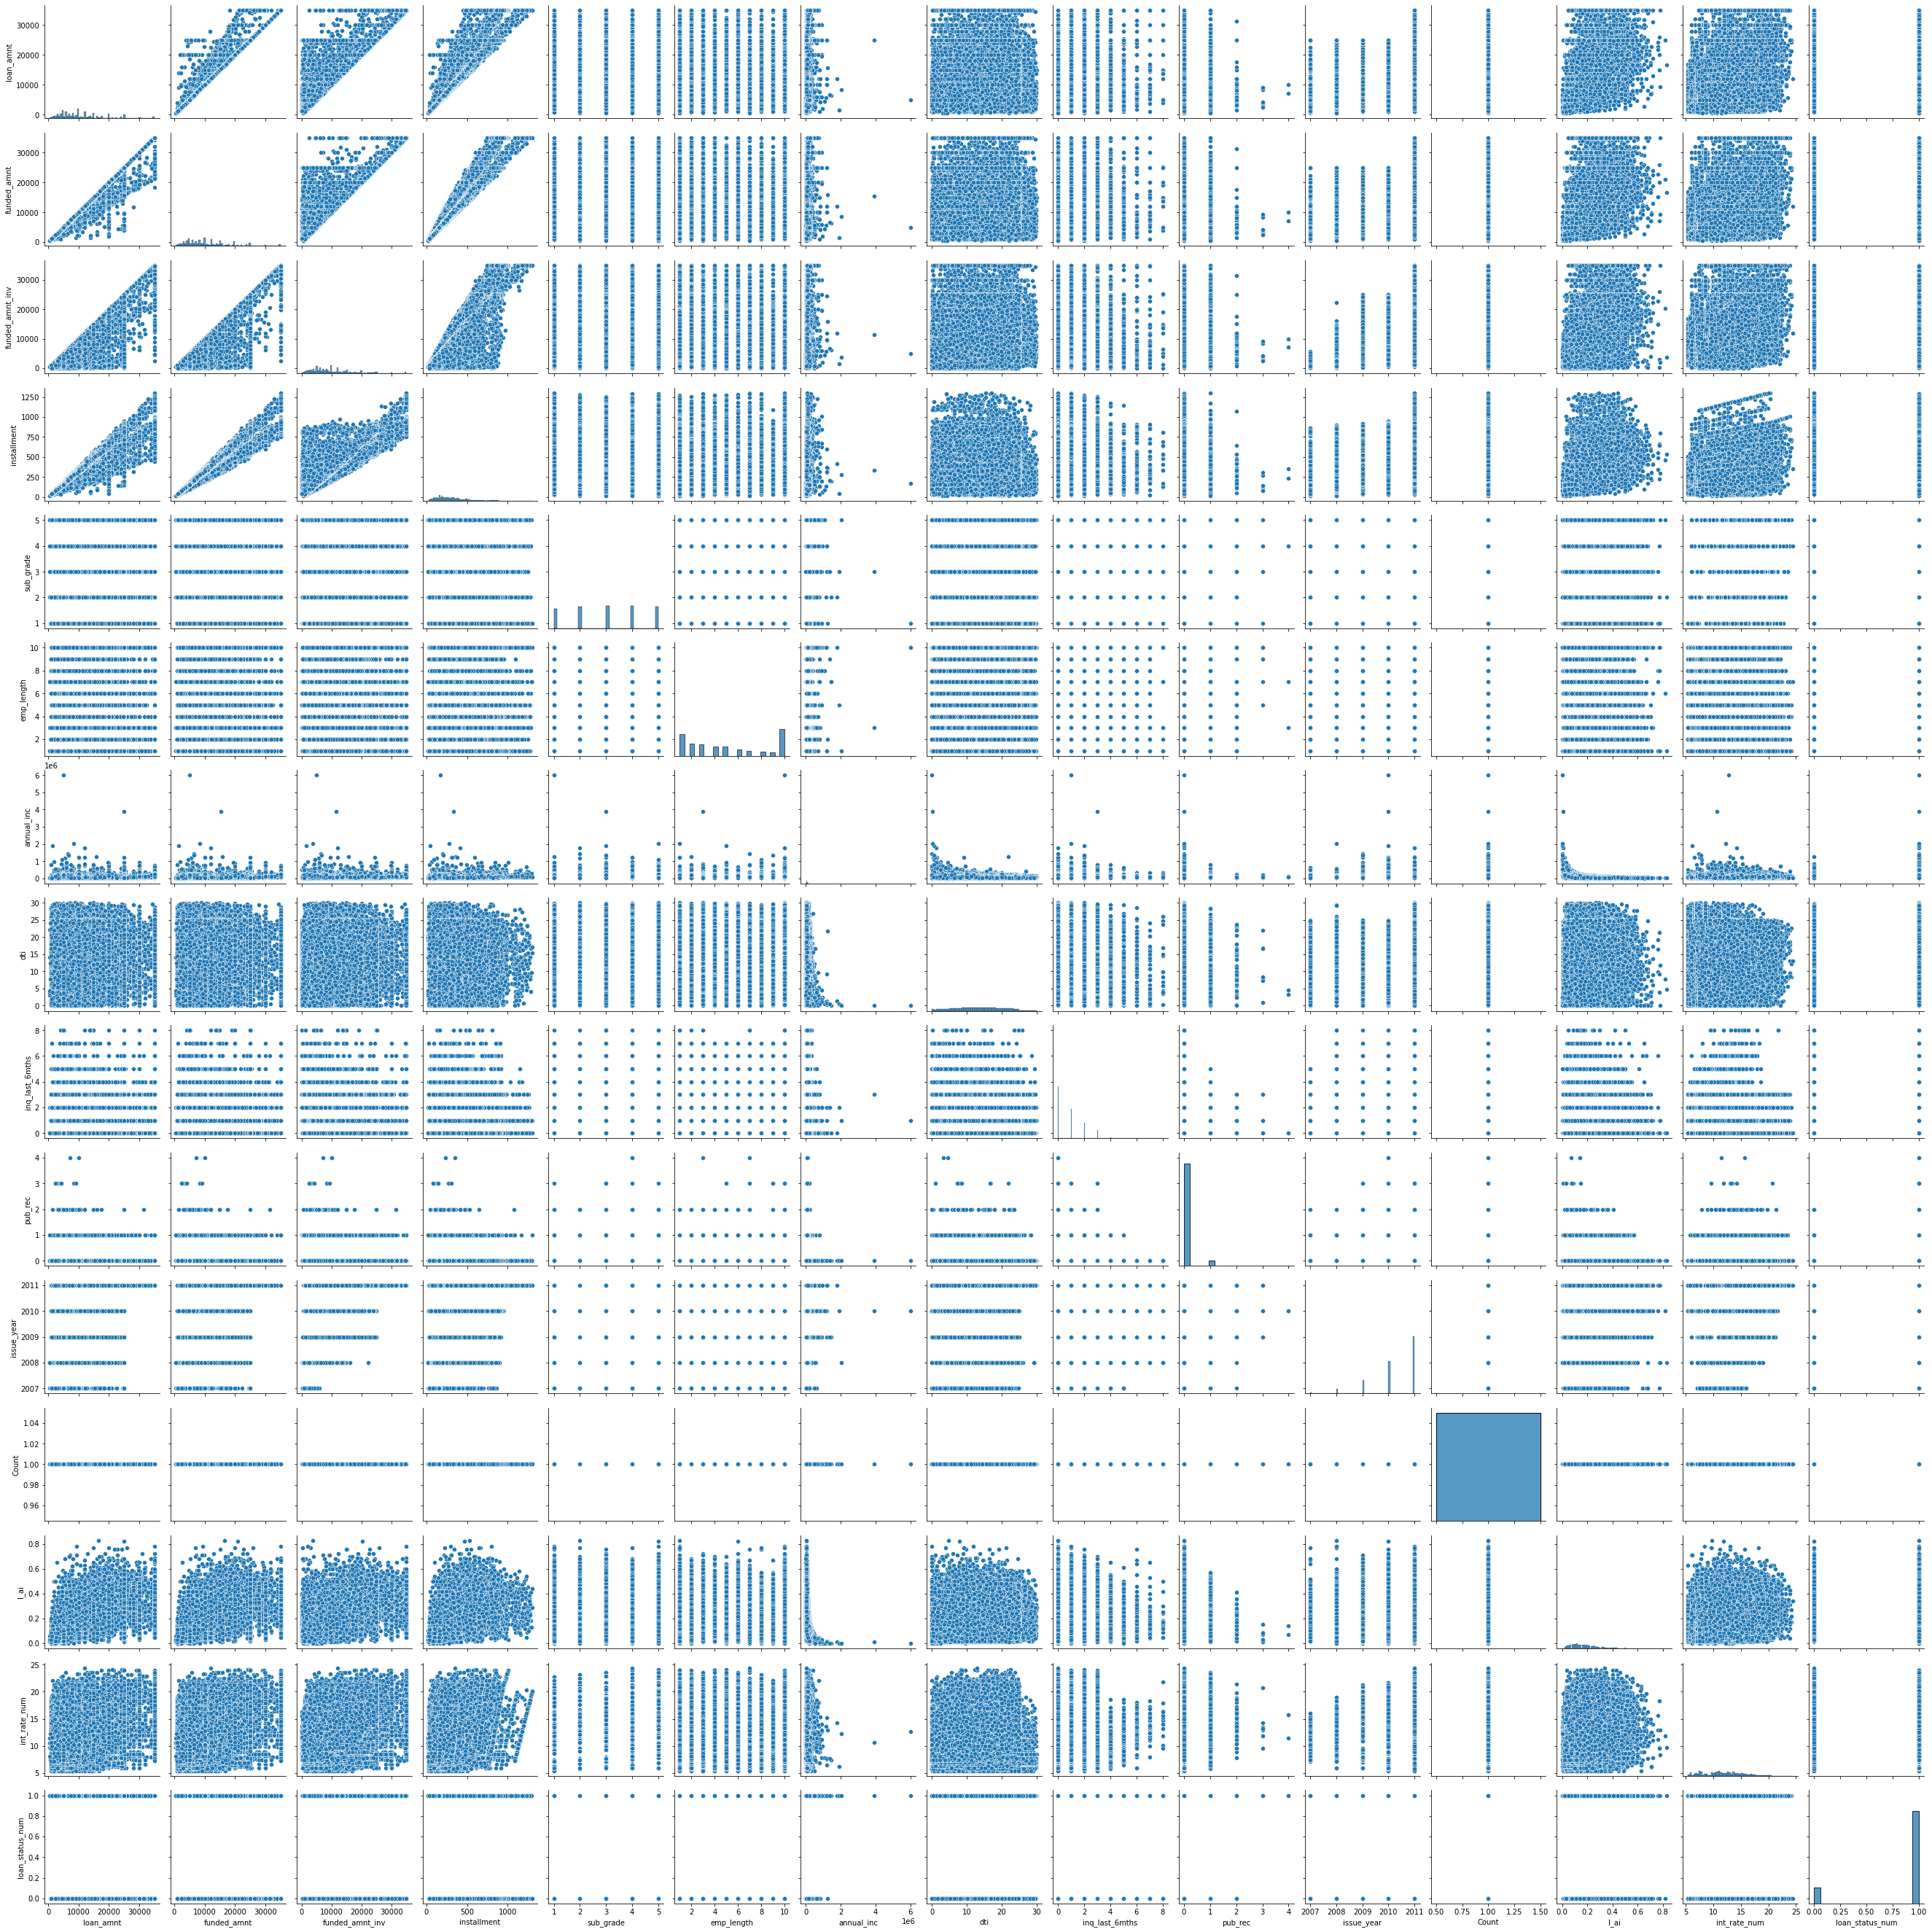

In [185]:
sns.pairplot(loan_data)
plt.show()

<AxesSubplot:>

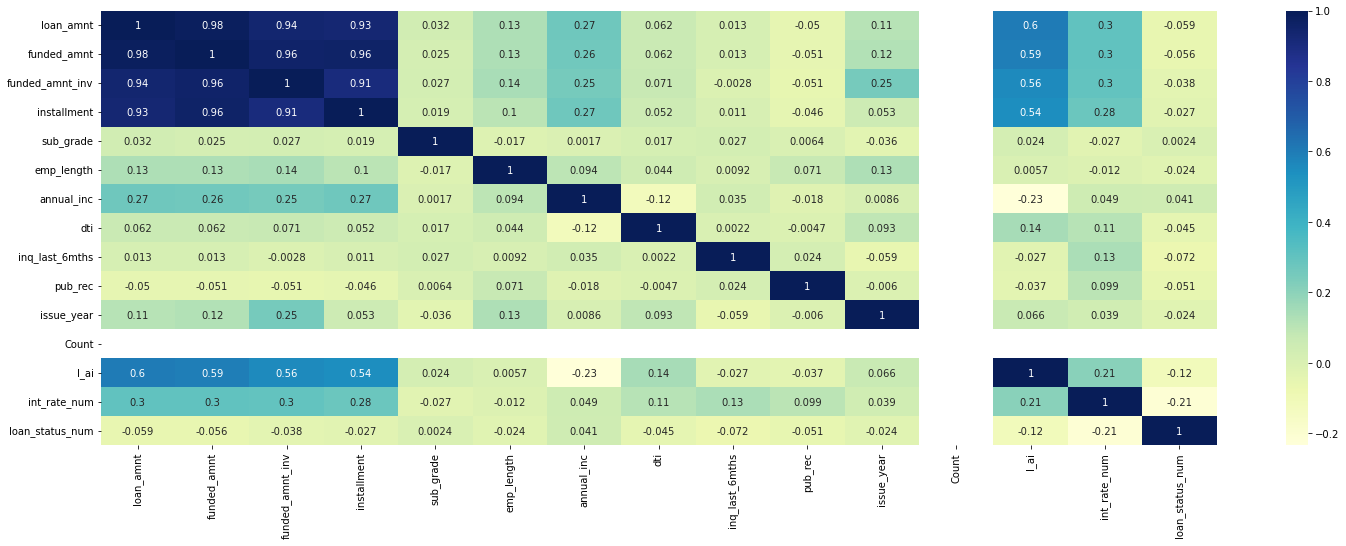

In [184]:
plt.figure(figsize=(25,8))
sns.heatmap(loan_data.corr(),  cmap="YlGnBu", annot=True)

### Insights

#### There are not much highly correlated variables apart from some obvious Loan_amnt & Funded_amnt, Loan_amnt & Funded_amnt_inv, Loan_amnt & installment